# Trabalho Final - Análise de Cogumelos venenosos para a criação de chás

## Por que chá

Sabemos que existem muitos tipos de cogumelos que podem ser venenosos ou não , dependendo do nível de toxicidade podem elevar a percepção e ser um alucinógeno psicodélico, que pode ser utilizado para chá , principalmente na região de São Tomé das Letras , sendo assim muito popular na região.

Os cogumelos alucinógenos, também conhecidos como cogumelos mágicos, são tipos de fungos que crescem nos solos e que possuem substâncias psicoativas capazes de promover alterações em regiões do cérebro e alterar a percepção da pessoa sobre as coisas que estão a sua volta.Este é o motivo de sua popularidade na cidade de São Thomé das Letras, cuja qual seus habitantes são descolados e quase em sua totalidade ouvinte de Raul Seixas.


## Mas antes de fazer seu chá, cuidado!!!! 

Entre milhares de espécies de fungos produtoras de cogumelos, apenas algumas dezenas contêm quantidades significativas de micotoxinas. As intoxicações por ingestão de micotoxinas presentes nos cogumelos podem ser classificadas em dois grandes grupos, de acordo com seu tempo de latência, definido como o intervalo que se verifica desde a ingestão até o aparecimento dos primeiros sintomas de envenenamento. Num primeiro grupo incluem-se as intoxicações com períodos de latência curtos, em que o intervalo desde a ingestão até o aparecimento dos primeiros sintomas é inferior a 4 horas. Estas intoxicações são regra geral consideradas como “leves”, não existindo risco de vida por mais aparatosos que sejam os sintomas. No segundo grupo incluem-se as intoxicações com períodos de latência longos em que o intervalo desde a ingestão até o aparecimento dos primeiros sintomas é superior a 4 horas. Estas intoxicações são consideradas como “muito graves”, podendo decorrer vários dias até surgirem os primeiros sintomas. Geralmente, as toxinas envolvidas neste último grupo de intoxicações provocam a falência das células de órgãos vitais, podendo ocasionar a morte.

In [25]:
import math
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output


### Parte 1: Análise e visualização de dados - Carga de dados

In [26]:
data = pd.read_csv('DataSource/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Parte 1: Análise e visualização de dados - Tamando e atributos

In [27]:
data.shape

(8124, 23)

Temos uma relação de 8124 cogumelos com 22 atributos. Temos uma quantidade razoável de colunas nesse DataSet.

Agora vamos ver se o DataSet possui dados nulos.

In [28]:
data.isnull().values.any()

False

Sem dados nulos, isso é muito bom e nos ajuda muito em nosso trabalho.

Vamos analisar os dados de cada atributos.

In [29]:
for feature in data.columns:
    uniq = np.unique(data[feature])
    print('{}: {} valores:  {}'.format(feature,len(uniq),uniq))

class: 2 valores:  ['e' 'p']
cap-shape: 6 valores:  ['b' 'c' 'f' 'k' 's' 'x']
cap-surface: 4 valores:  ['f' 'g' 's' 'y']
cap-color: 10 valores:  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises: 2 valores:  ['f' 't']
odor: 9 valores:  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment: 2 valores:  ['a' 'f']
gill-spacing: 2 valores:  ['c' 'w']
gill-size: 2 valores:  ['b' 'n']
gill-color: 12 valores:  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape: 2 valores:  ['e' 't']
stalk-root: 5 valores:  ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring: 4 valores:  ['f' 'k' 's' 'y']
stalk-surface-below-ring: 4 valores:  ['f' 'k' 's' 'y']
stalk-color-above-ring: 9 valores:  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring: 9 valores:  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type: 1 valores:  ['p']
veil-color: 4 valores:  ['n' 'o' 'w' 'y']
ring-number: 3 valores:  ['n' 'o' 't']
ring-type: 5 valores:  ['e' 'f' 'l' 'n' 'p']
spore-print-color: 9 valores:  ['b' 'h' 'k' 'n'

Nesse Dataset temos todos os cogumelos com o atributo "veil-type" iguais. Isso pode indicar um viés no DataSet ou que existe apenas esse tipo de cogumelo no mundo. De qualquer forma, vamos remover essa coluna, já que não tem nenhuma diferença nos dados.

In [30]:
# removendo a coluna veil-type
data = data.drop(['veil-type'], axis=1)

Vamos analisar os dados duplicados


In [31]:
print('Total de cogumelos: {}\nTotal de cogumelos únicos: {}'.format(len(data.index),len(data.drop_duplicates().index)))

Total de cogumelos: 8124
Total de cogumelos únicos: 8124


Sem dados duplicados de novo, isso é muito bom e nos ajuda muito em nosso trabalho.

Agora vamos analisar os demais atributos em relação ao atributo "class", que nós indica se o cogumelo é venenoso ou não.

In [32]:
print('Total de cogumelos: {}\nTotal de cogumelos com os mesmos atributos: {}'.format(
    len(data.index),len(data.drop_duplicates(subset=data.drop(['class'],axis=1).columns).index)))

Total de cogumelos: 8124
Total de cogumelos com os mesmos atributos: 8124


Sem dados duplicados novamente, isso nos poupo muito, mas muito trabalho.

### Parte 1: Análise e visualização de dados - Tipos de Dados

Hora de analisar os dados

In [33]:
#analise de tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

Vamos analisar agora a correção dos dados, mas, temos um pequeno detalhe, as formas ‘mais comuns’ de analise de correlação ocorrem com dados do tipo numérico e não qualitativos, vamos ter que procurar na internet uma forma de fazer isso, voltamos em instantes.

Bem, não voltamos tão rápido assim, parece que é mais complexo do que imaginamos, o que ganhamos de tempo não tratando dados nulos ou duplicados tivemos que gastar nessa pesquisa, mas felizmente encontramos **[Theil's U](https://en.wikipedia.org/wiki/Uncertainty_coefficient)**.

Ele pode ser encontrado também como _Uncertainty Coefficient_ (Coeficiente de Incerteza).

Utilizando da formula `U(x|y)`, esse coeficiente fornece um valor no intervalo de `[0,1]`, onde 0 significa que o recurso `y` não fornece informações sobre o recurso x e 1 que fornece informações.


Vamos criar as nossas funcções para nos ajudar nas analises


In [34]:
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

Criada as funções, vamos analisar os dados agora ~~depois de muitos erros na criação das funções é claro~~.

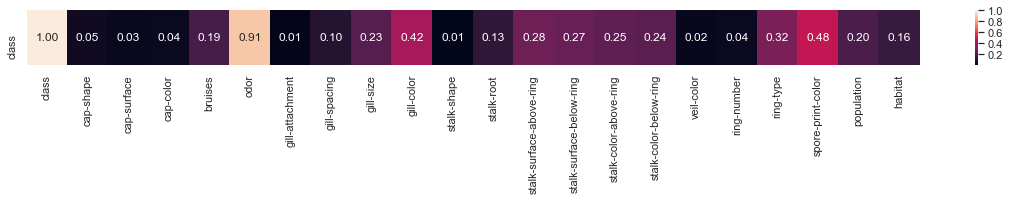

In [35]:
theilu = pd.DataFrame(index=['class'],columns=data.columns)

columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['class'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

"odor" tem uma correlação grande com os demais dados, vamos dar uma olhada com mais detalhes então.

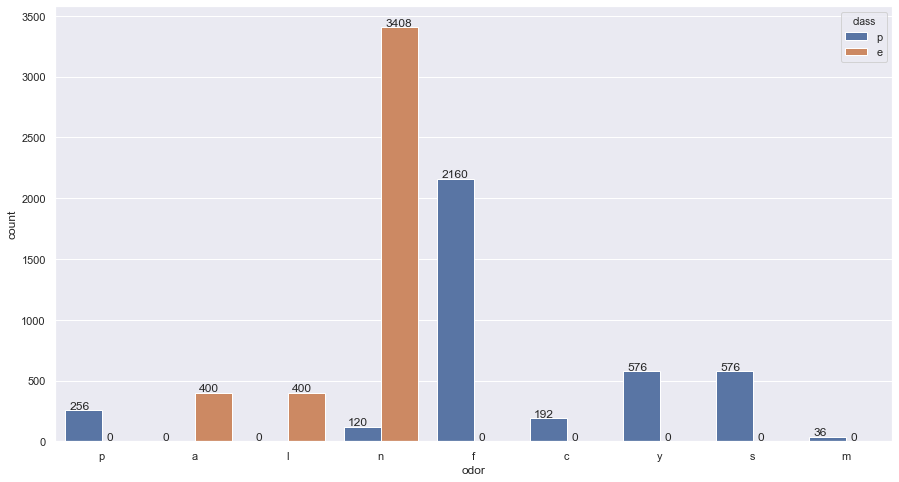

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=data)

for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()


Interessante, podemos dizer que alguns cogumelos são comestíveis pelo cheiro.

Mas existem cogumelos sem cheiro (`odor = 'n'`), vamos dar uma olhada com mais carinho nesses caras então.


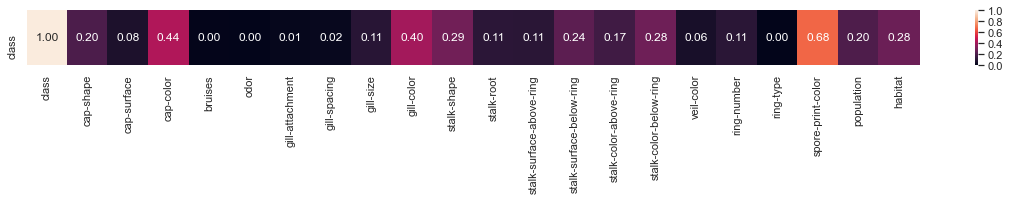

In [37]:
# pego os cogumelos sem cheiro (odor=n) apenas
no_odor = data[data['odor'].isin(['n'])] 

for j in range(0,len(columns)):
    u = theil_u(no_odor['class'].tolist(),no_odor[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

Hora hora , o "spore-print-color" ganhou um belo destaque, vamos dar uma olhada com mais atenção nele.

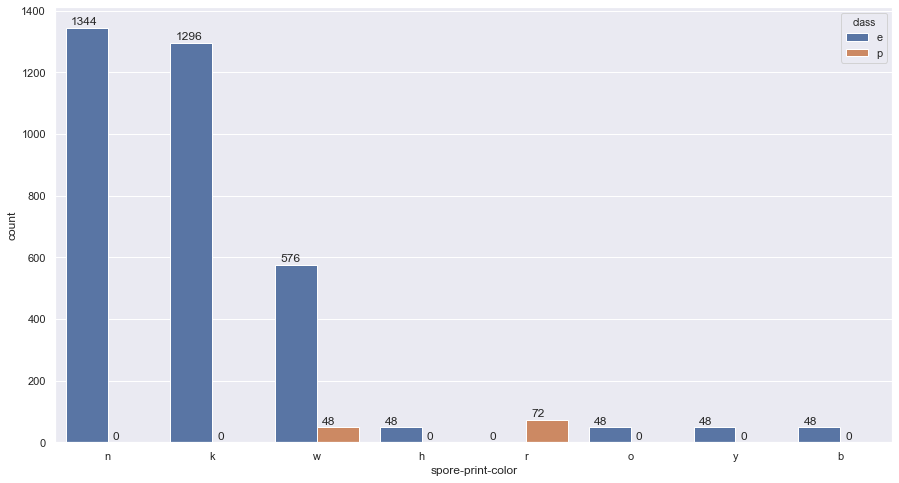

In [38]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='spore-print-color',hue='class',data=no_odor)

for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

Vejam só, dentre os cogumelos sem cheiro, se considerarmos o “spore-print-color” temos uma grande quantidade de cogumelos comestíveis (mas vamos tomar cuidado com os vermelhos e brancos (`w` e `r`) heim.

Vamos dar uma olhada nesses cogumelos mais perigosos então.

In [39]:
# Filtro por spore-print-color, da cor branca(w) e vermelha(r)
no_odor_w = no_odor[no_odor['spore-print-color'].isin(['w','r'])]
no_odor_w

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,s,e,w,w,t,e,w,c,w
4106,p,b,s,b,t,n,f,c,b,g,...,s,s,w,w,w,t,p,r,v,m
4165,e,f,f,c,f,n,f,w,n,w,...,f,f,w,n,w,o,e,w,v,l
4276,e,k,y,n,f,n,f,w,n,w,...,f,f,w,n,w,o,e,w,v,l
4283,e,f,s,p,t,n,f,c,b,e,...,s,s,w,w,w,t,e,w,c,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,e,b,s,g,f,n,f,w,b,g,...,k,s,w,w,w,t,p,w,n,g
8096,e,k,f,w,f,n,f,w,b,w,...,k,s,w,w,w,t,p,w,n,g
8099,e,k,f,w,f,n,f,w,b,w,...,k,k,w,w,w,t,p,w,s,g
8109,e,b,s,w,f,n,f,w,b,w,...,s,s,w,w,w,t,p,w,n,g


In [40]:
(len(data.index) - len(no_odor_w.index)) / len(data.index)

0.914327917282127

**Nessa análise, o que podemos dizer desses 92% dos cogumelos. **
* Se o cogumelo tem cheiro de amêndoa (`a`) ou anis (`l`), podemos fazer chá com ele.
* se não tiver cheiro, temos que verifique a cor dos esporos("spore-print-color") onde se é branco (`w`) ou vermelho (`r`), temos que tomar cuidado, já os demais, podemos fazer chá.


Para os demais 8%, vamos utilizar uma Árvore de decisão, que irá fazer o mesmo trabalho que fizemos até o momento, porém, classificando os 8% restante. Como os dados são qualitativos, vamos precisar de um “one-hot-encode” para transformar os dados.

In [41]:
#factorized_nw = no_odor_w.copy()
factorized_nw = data.copy()

for column in factorized_nw.columns.values:
    f, _ = pd.factorize(factorized_nw[column])
    factorized_nw.loc[:,column] = f
ohe = sp.OneHotEncoder()
X = factorized_nw.drop(['class'],axis=1)
y = factorized_nw['class'].tolist()
ohe.fit(X)
X = ohe.transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #por que 42 é a respota de tudo

for i in range(1,10):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42) #por que 42 é a respota de tudo
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    print("max_depth: {} - acurácia:".format(i), accuracy_score(y_test, y_pred, normalize=True))

max_depth: 1 - acurácia: 0.880846873461349
max_depth: 2 - acurácia: 0.9519940915805022
max_depth: 3 - acurácia: 0.9847365829640571
max_depth: 4 - acurácia: 0.9916297390448056
max_depth: 5 - acurácia: 0.9980305268340719
max_depth: 6 - acurácia: 0.9985228951255539
max_depth: 7 - acurácia: 0.9985228951255539
max_depth: 8 - acurácia: 0.9997538158542589
max_depth: 9 - acurácia: 1.0


## Considerações finais

Como o dataset de acidentes era bem complexo e grande, decidimos partir para um mais simples, mas não tão utilizados, e encontramos o de cogumelos. Nesse procuramos classificar se o mesmo era venenoso ou não.


Esse DataSet possui as mesmas características do DataSet de acidentes, em uma proporção bem menor, porém, mais fácil de entendermos o que estávamos fazendo. Nele entendemos de uma forma melhor como utilizar o one-hot-encode assim como a formula **[Theil's U](https://en.wikipedia.org/wiki/Uncertainty_coefficient)** (quando utilizamos no DataSet de acidentes, demorou muito, assim como após gerado o gráfico, ficava impossível de entender algo, já que a matrix de informação era imensa).


Com menos dados podemos entender melhor como ele funcionava e ajustar os gráficos e dados para uma compreensão melhor quando voltamos para o DataSet de acidentes.
Por fim, como praticamente fizemos os 2 projetos, conversando com o professor, ele achou uma boa apresentar os 2 e apontar as dificuldades de cada um, por isso que agora estamos apresentando os dois projetos.

Na parte de fluxo de trabalho, seguimos o mesmo que informamos no DataSet de acidentes, iniciamos no Python e finalizamos no C#.
•	Analise e tratamento de dados no Python;<br>
•	Geração de DataSet tratado pelo Python;<br>
•	Carga do DataSet tratado no C#;<br>
•	Criação do modelo de predição no C#;<br>
•	Carregamento do modelo de predição no C#;<br>
•	Criação da API no C#;<br>
•	Criação da tela de UI no C#.;<br>

Acho que é isso pessoal

Obrigado a todos e ao professor.
